<a href="https://colab.research.google.com/github/pks98/Project/blob/main/project_FE.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd

In [2]:
df=pd.read_csv('co2_emissions (1).csv',sep=';')

In [3]:
# df.head()

In [4]:
# df['vehicle_class'].value_counts() 

In [5]:
# df['model'].unique()

In [6]:
# df.describe()

In [7]:
# df[df.duplicated()]

In [8]:
# df=df.drop_duplicates().reset_index().drop('index',axis=1)

In [9]:
# df.shape

In [10]:
# df.head()

In [11]:
# import seaborn as sns

# sns.heatmap(df.corr(),annot=True,)

In [12]:
# import matplotlib.pyplot as plt
# for i in df.columns:
#   if df[i].dtype != 'object':
#     plt.title(i)
#     sns.distplot(df[i])
#     plt.figure(figsize=(10,4))
#     sns.distplot(df[i])
    

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7385 entries, 0 to 7384
Data columns (total 12 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   make                            7385 non-null   object 
 1   model                           7385 non-null   object 
 2   vehicle_class                   7385 non-null   object 
 3   engine_size                     7385 non-null   float64
 4   cylinders                       7385 non-null   int64  
 5   transmission                    7385 non-null   object 
 6   fuel_type                       7385 non-null   object 
 7   fuel_consumption_city           7385 non-null   float64
 8   fuel_consumption_hwy            7385 non-null   float64
 9   fuel_consumption_comb(l/100km)  7385 non-null   float64
 10  fuel_consumption_comb(mpg)      7385 non-null   int64  
 11  co2_emissions                   7385 non-null   int64  
dtypes: float64(4), int64(3), object(5)

In [14]:
# from sklearn.preprocessing import OneHotEncoder
# from sklearn.compose import ColumnTransformer

In [15]:
categorical_columns=[]
for i in df.columns:
  if df[i].dtype == 'object':
    categorical_columns.append(i)

In [16]:
categorical_columns

['make', 'model', 'vehicle_class', 'transmission', 'fuel_type']

In [17]:
# transformer=ColumnTransformer(transformers=[
#                         ('t',OneHotEncoder(drop='first',sparse=False),categorical_columns)                    
# ],remainder='passthrough')


In [18]:
df.columns

Index(['make', 'model', 'vehicle_class', 'engine_size', 'cylinders',
       'transmission', 'fuel_type', 'fuel_consumption_city',
       'fuel_consumption_hwy', 'fuel_consumption_comb(l/100km)',
       'fuel_consumption_comb(mpg)', 'co2_emissions'],
      dtype='object')

In [19]:
categorical_columns

['make', 'model', 'vehicle_class', 'transmission', 'fuel_type']

In [20]:
df.head()

,make,model,vehicle_class,engine_size,cylinders,transmission,fuel_type,fuel_consumption_city,fuel_consumption_hwy,fuel_consumption_comb(l/100km),fuel_consumption_comb(mpg),co2_emissions
0,ACURA,ILX,COMPACT,2.0,4,AS,Z,9.9,6.7,8.5,33,196
1,ACURA,ILX,COMPACT,2.4,4,M,Z,11.2,7.7,9.6,29,221
2,ACURA,ILX HYBRID,COMPACT,1.5,4,AV,Z,6.0,5.8,5.9,48,136
3,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS,Z,12.7,9.1,11.1,25,255
4,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS,Z,12.1,8.7,10.6,27,244


In [21]:
dummy_df=pd.get_dummies(df[categorical_columns],drop_first=True)

In [22]:
remaining_df=df.drop(categorical_columns,axis=1)

In [23]:
remaining_df.head()

,engine_size,cylinders,fuel_consumption_city,fuel_consumption_hwy,fuel_consumption_comb(l/100km),fuel_consumption_comb(mpg),co2_emissions
0,2.0,4,9.9,6.7,8.5,33,196
1,2.4,4,11.2,7.7,9.6,29,221
2,1.5,4,6.0,5.8,5.9,48,136
3,3.5,6,12.7,9.1,11.1,25,255
4,3.5,6,12.1,8.7,10.6,27,244


In [24]:
final_df=pd.concat([dummy_df,remaining_df],axis=1)

In [25]:
final_df.head()

,make_ALFA ROMEO,make_ASTON MARTIN,make_AUDI,make_BENTLEY,make_BMW,make_BUGATTI,make_BUICK,make_CADILLAC,make_CHEVROLET,make_CHRYSLER,...,fuel_type_N,fuel_type_X,fuel_type_Z,engine_size,cylinders,fuel_consumption_city,fuel_consumption_hwy,fuel_consumption_comb(l/100km),fuel_consumption_comb(mpg),co2_emissions
0,0,0,0,0,0,0,0,0,0,0,...,0,0,1,2.0,4,9.9,6.7,8.5,33,196
1,0,0,0,0,0,0,0,0,0,0,...,0,0,1,2.4,4,11.2,7.7,9.6,29,221
2,0,0,0,0,0,0,0,0,0,0,...,0,0,1,1.5,4,6.0,5.8,5.9,48,136
3,0,0,0,0,0,0,0,0,0,0,...,0,0,1,3.5,6,12.7,9.1,11.1,25,255
4,0,0,0,0,0,0,0,0,0,0,...,0,0,1,3.5,6,12.1,8.7,10.6,27,244


In [26]:
final_df.shape

(7385, 2123)

In [27]:
final_df[final_df.duplicated()]

,make_ALFA ROMEO,make_ASTON MARTIN,make_AUDI,make_BENTLEY,make_BMW,make_BUGATTI,make_BUICK,make_CADILLAC,make_CHEVROLET,make_CHRYSLER,...,fuel_type_N,fuel_type_X,fuel_type_Z,engine_size,cylinders,fuel_consumption_city,fuel_consumption_hwy,fuel_consumption_comb(l/100km),fuel_consumption_comb(mpg),co2_emissions
1075,0,0,0,0,0,0,0,0,0,0,...,0,0,1,3.5,6,12.1,8.7,10.6,27,244
1076,0,0,0,0,0,0,0,0,0,0,...,0,0,1,3.5,6,11.9,7.7,10.0,28,230
1081,1,0,0,0,0,0,0,0,0,0,...,0,0,1,1.8,4,9.7,6.9,8.4,34,193
1082,0,1,0,0,0,0,0,0,0,0,...,0,0,1,5.9,12,18.0,12.6,15.6,18,359
1084,0,1,0,0,0,0,0,0,0,0,...,0,0,1,4.7,8,17.4,11.3,14.7,19,338
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7356,0,0,0,0,0,0,0,0,0,0,...,0,1,0,5.7,8,17.7,13.6,15.9,18,371
7365,0,0,0,0,0,0,0,0,0,0,...,0,1,0,2.0,4,9.8,7.3,8.7,32,203
7366,0,0,0,0,0,0,0,0,0,0,...,0,1,0,1.4,4,7.8,5.9,7.0,40,162
7367,0,0,0,0,0,0,0,0,0,0,...,0,1,0,1.4,4,7.9,5.9,7.0,40,163


In [28]:
final_df=final_df.drop_duplicates().reset_index().drop('index',axis=1)

In [29]:
final_df.sample(5)

,make_ALFA ROMEO,make_ASTON MARTIN,make_AUDI,make_BENTLEY,make_BMW,make_BUGATTI,make_BUICK,make_CADILLAC,make_CHEVROLET,make_CHRYSLER,...,fuel_type_N,fuel_type_X,fuel_type_Z,engine_size,cylinders,fuel_consumption_city,fuel_consumption_hwy,fuel_consumption_comb(l/100km),fuel_consumption_comb(mpg),co2_emissions
4111,0,0,1,0,0,0,0,0,0,0,...,0,0,1,4.0,8,15.1,9.1,12.4,23,290
713,0,0,0,0,0,0,0,0,0,0,...,0,1,0,2.0,4,8.2,5.9,7.2,39,166
5084,0,0,0,0,0,0,0,0,0,0,...,0,1,0,5.0,8,15.1,11.0,13.3,21,312
2802,0,0,0,0,0,0,0,0,0,0,...,0,0,1,2.0,4,10.8,9.5,10.2,28,233
1993,0,0,0,0,0,0,0,0,0,0,...,0,1,0,2.0,4,9.8,7.6,8.8,32,202


In [30]:
final_df.shape

(6273, 2123)

In [31]:
x=final_df.drop('co2_emissions',axis=1)
y=final_df['co2_emissions']

In [32]:
x.shape

(6273, 2122)

In [33]:
x.head()

,make_ALFA ROMEO,make_ASTON MARTIN,make_AUDI,make_BENTLEY,make_BMW,make_BUGATTI,make_BUICK,make_CADILLAC,make_CHEVROLET,make_CHRYSLER,...,fuel_type_E,fuel_type_N,fuel_type_X,fuel_type_Z,engine_size,cylinders,fuel_consumption_city,fuel_consumption_hwy,fuel_consumption_comb(l/100km),fuel_consumption_comb(mpg)
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,2.0,4,9.9,6.7,8.5,33
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,2.4,4,11.2,7.7,9.6,29
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,1.5,4,6.0,5.8,5.9,48
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,3.5,6,12.7,9.1,11.1,25
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,3.5,6,12.1,8.7,10.6,27


In [34]:
from sklearn.preprocessing import MinMaxScaler

scaler=MinMaxScaler()

scaled=scaler.fit_transform(x)

In [35]:
scaled[:5,:]

array([[0.        , 0.        , 0.        , ..., 0.1626506 , 0.2       ,
        0.37931034],
       [0.        , 0.        , 0.        , ..., 0.22289157, 0.25      ,
        0.31034483],
       [0.        , 0.        , 0.        , ..., 0.10843373, 0.08181818,
        0.63793103],
       [0.        , 0.        , 0.        , ..., 0.30722892, 0.31818182,
        0.24137931],
       [0.        , 0.        , 0.        , ..., 0.28313253, 0.29545455,
        0.27586207]])

In [36]:
from sklearn.decomposition import PCA

pca=PCA(n_components=600)
pca_values=pca.fit_transform(scaled)
pca_values


array([[-7.22236838e-01, -4.50872922e-01, -2.87700389e-01, ...,
         1.94821259e-03,  5.30851099e-03, -7.13080613e-03],
       [-5.98990050e-01,  7.74304113e-01, -2.47754221e-01, ...,
         1.44993804e-03,  4.65807500e-03, -5.39868902e-03],
       [-4.73010514e-01,  5.00333487e-01, -3.67898977e-01, ...,
         1.78680755e-02, -9.93972656e-03,  2.77372328e-02],
       ...,
       [-5.96191567e-01, -5.75088565e-01, -3.67737866e-01, ...,
         2.02481019e-03,  9.28641458e-04, -8.89389929e-04],
       [-7.51832059e-01, -5.61967563e-01,  4.70874936e-02, ...,
         8.33063635e-03,  2.09919100e-02, -3.09366014e-02],
       [-7.59344270e-01, -5.67190491e-01,  8.07987452e-02, ...,
         3.77039274e-03,  2.61248844e-03,  4.43162291e-04]])

In [37]:
var=pca.explained_variance_ratio_
var

array([1.36164639e-01, 7.79928737e-02, 5.07248035e-02, 4.11612702e-02,
       3.47876835e-02, 2.88925236e-02, 2.56760102e-02, 2.35957430e-02,
       2.21703222e-02, 2.05538897e-02, 1.86394919e-02, 1.75926388e-02,
       1.72696429e-02, 1.51319684e-02, 1.46808776e-02, 1.31200510e-02,
       1.17388348e-02, 1.05928825e-02, 1.04049373e-02, 8.87458257e-03,
       8.52799727e-03, 8.25698565e-03, 8.05195482e-03, 7.80307158e-03,
       7.24050422e-03, 7.05779458e-03, 6.59355659e-03, 6.23170701e-03,
       5.94160416e-03, 5.80348528e-03, 5.53629383e-03, 4.96616877e-03,
       4.87576379e-03, 4.81958432e-03, 4.63897884e-03, 4.47056940e-03,
       4.02147600e-03, 3.89338150e-03, 3.78590482e-03, 3.69163220e-03,
       3.27077525e-03, 3.17354471e-03, 2.92731738e-03, 2.76826736e-03,
       2.70402823e-03, 2.46899176e-03, 2.32854750e-03, 2.14970342e-03,
       2.11022025e-03, 1.88393938e-03, 1.81821585e-03, 1.73203854e-03,
       1.62859722e-03, 1.59598391e-03, 1.37722038e-03, 1.29148434e-03,
      

In [38]:
import numpy as np

var1=np.cumsum(np.round(var,4)*100)
var1

array([13.62, 21.42, 26.49, 30.61, 34.09, 36.98, 39.55, 41.91, 44.13,
       46.19, 48.05, 49.81, 51.54, 53.05, 54.52, 55.83, 57.  , 58.06,
       59.1 , 59.99, 60.84, 61.67, 62.48, 63.26, 63.98, 64.69, 65.35,
       65.97, 66.56, 67.14, 67.69, 68.19, 68.68, 69.16, 69.62, 70.07,
       70.47, 70.86, 71.24, 71.61, 71.94, 72.26, 72.55, 72.83, 73.1 ,
       73.35, 73.58, 73.79, 74.  , 74.19, 74.37, 74.54, 74.7 , 74.86,
       75.  , 75.13, 75.26, 75.37, 75.48, 75.58, 75.68, 75.76, 75.84,
       75.92, 76.  , 76.07, 76.14, 76.21, 76.28, 76.35, 76.42, 76.49,
       76.56, 76.63, 76.69, 76.75, 76.81, 76.87, 76.93, 76.99, 77.05,
       77.11, 77.17, 77.23, 77.29, 77.35, 77.4 , 77.45, 77.5 , 77.55,
       77.6 , 77.65, 77.7 , 77.75, 77.8 , 77.85, 77.9 , 77.95, 78.  ,
       78.05, 78.09, 78.13, 78.17, 78.21, 78.25, 78.29, 78.33, 78.37,
       78.41, 78.45, 78.49, 78.53, 78.57, 78.61, 78.65, 78.69, 78.73,
       78.77, 78.81, 78.85, 78.89, 78.93, 78.97, 79.01, 79.05, 79.09,
       79.13, 79.17,

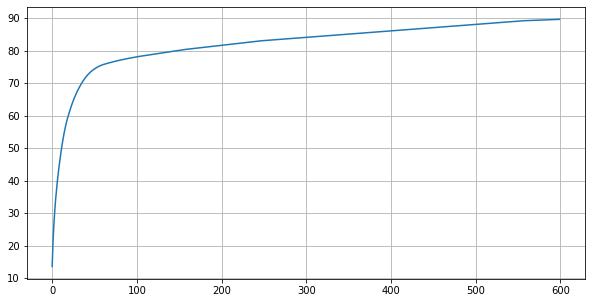

In [40]:
import matplotlib.pyplot as plt 

plt.figure(figsize=(10,5))
plt.grid()
plt.plot(var1)

In [41]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(pca_values[:,0:651], y, test_size=0.2, random_state=42)

In [42]:
X_train.shape

(5018, 600)

In [43]:
X_train

array([[ 7.19621766e-01,  2.48561028e-01, -3.92016426e-01, ...,
        -5.91380531e-03, -4.03968561e-02,  1.13298937e-02],
       [ 6.59001004e-01,  2.17731545e-01,  7.08960457e-01, ...,
        -1.65555108e-03,  4.94221627e-04, -1.01844854e-03],
       [ 8.16069974e-01,  3.95920768e-01, -2.04288370e-01, ...,
        -5.84407241e-03, -1.49745434e-03, -2.50616284e-05],
       ...,
       [ 7.32957065e-01, -6.70858957e-01, -2.70409068e-01, ...,
         1.88897465e-02,  1.15599469e-02,  2.42726956e-02],
       [ 7.45511253e-01,  6.56122978e-01, -3.14493681e-01, ...,
        -4.80970590e-03, -4.13477927e-03,  1.28649282e-03],
       [ 9.60483026e-01,  3.24334285e-01, -2.85944153e-01, ...,
         3.90537114e-03,  1.13341105e-02, -1.82799232e-04]])

In [44]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

le=LinearRegression()

le.fit(X_train,y_train)
lrpred=le.predict(X_test)

lr_accuracy=r2_score(y_test,lrpred)
print('LinearRegression: ',lr_accuracy)

LinearRegression:  0.993313622316916


In [45]:
from sklearn.tree import DecisionTreeRegressor

dt=DecisionTreeRegressor()

dt.fit(X_train,y_train)
DTpred=dt.predict(X_test)

DT_accuracy=r2_score(y_test,DTpred)
print("DecisionTreeRegressor: ",DT_accuracy)

DecisionTreeRegressor:  0.9367758465558289


In [46]:
from sklearn.svm import SVR

se=SVR()

se.fit(X_train,y_train)
sepred=se.predict(X_test)

SVR_accuracy=r2_score(y_test,sepred)
print("SVR: ",SVR_accuracy)

SVR:  0.7784688563594975


In [47]:
from sklearn.ensemble import RandomForestRegressor

rf=RandomForestRegressor()

rf.fit(X_train,y_train)
rfpred=rf.predict(X_test)

Rf_accuracy=r2_score(y_test,rfpred)
print("RandomForestRegressor: ",Rf_accuracy)

RandomForestRegressor:  0.9694324924584825


In [48]:
from sklearn.linear_model import Ridge

r=Ridge()

r.fit(X_train,y_train)
rpred=r.predict(X_test)

r_accuracy=r2_score(y_test,rpred)
print("Ridge: ",r_accuracy)

Ridge:  0.9933314821452227


In [49]:
from sklearn.linear_model import Lasso

l=Lasso()

l.fit(X_train,y_train)
lpred=l.predict(X_test)

l_accuracy=r2_score(y_test,lpred)
print("Lasso: ",l_accuracy)

Lasso:  0.8540004360296564


In [50]:
accuracy=pd.Series([lr_accuracy,r_accuracy,Rf_accuracy,DT_accuracy,l_accuracy,SVR_accuracy])

In [51]:
models=pd.Series(['LinearRegression','Ridge','RandomForestRegressor','DecisionTreeRegressor','Lasso','SVR'])

In [52]:
data={'Model':models,'Accuracy':accuracy}

In [53]:
accuracy_df=pd.DataFrame(data)

In [54]:
accuracy_df

,Model,Accuracy
0,LinearRegression,0.993314
1,Ridge,0.993331
2,RandomForestRegressor,0.969432
3,DecisionTreeRegressor,0.936776
4,Lasso,0.854000
5,SVR,0.778469
